In [24]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [25]:
class AgentState(TypedDict):
    word: str
    num: int
    final: str

In [26]:
def vehicle(state: AgentState) -> AgentState:
    """This node adds the vehicle brand"""
    state["final"] = f"Brand: Toyota. "
    return state

def model(state: AgentState) -> AgentState:
    """This node selects the vehicle model"""
    state["final"] = state["final"] + f"Model: RAV-4."
    return state

def engine_type(state: AgentState) -> AgentState:
    """This node selects the engine type"""
    state["final"] = state["final"] + f"Engine: Electric. "
    return state

def manufacturing_origin(state: AgentState) -> AgentState:
    """This node selects the manufacturing country"""
    state["final"] = state["final"] + f"Manufacturing Country: UK. "
    return state

def simulation_configuration1(state: AgentState) -> AgentState:
    """This node configures the supply chain simulation"""
    state["final"] = state["final"] + f"Simulation Parameters: XY... "
    return state

def simulation_configuration2(state: AgentState) -> AgentState:
    """This node configures the supply chain simulation"""
    state["final"] = state["final"] + f"Simulation Parameters: YZ... "
    return state

def simulation_configuration3(state: AgentState) -> AgentState:
    """This node configures the supply chain simulation"""
    state["final"] = state["final"] + f"Simulation Parameters: ZZ... "
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    if state["word"] == "1":
        return "simulation1"
    elif state["word"] == "2":
        return "simulation2"
    elif state["word"] == "3":
        return "simulation3"

def export_results(state: AgentState) -> AgentState:
    """This node is for exporting the results from the simulation to Power BI"""
    state["final"] = state["final"] + f"Exporting to .csv and Power BI. "

In [27]:
graph = StateGraph(AgentState)

graph.add_node("vehicle_node", vehicle)
graph.add_node("model_node", model)
graph.add_node("engine_node", engine_type)
graph.add_node("manufacturing_origin", manufacturing_origin)
graph.add_node("simulation_config1_node", simulation_configuration1)
graph.add_node("simulation_config2_node", simulation_configuration2)
graph.add_node("simulation_config3_node", simulation_configuration3)
graph.add_node("router", lambda state:state)
graph.add_node("export_results", export_results)

graph.add_edge(START, "vehicle_node")
graph.add_edge("vehicle_node", "model_node")
graph.add_edge("model_node", "engine_node")
graph.add_edge("engine_node", "manufacturing_origin")
graph.add_edge("manufacturing_origin", "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "simulation1": "simulation_config1_node",
        "simulation2": "simulation_config2_node",
        "simulation3": "simulation_config3_node",
    }
)
graph.add_edge("simulation_config1_node", "export_results")
graph.add_edge("simulation_config2_node", "export_results")
graph.add_edge("simulation_config3_node", "export_results")
graph.add_edge("export_results", END)

app = graph.compile()

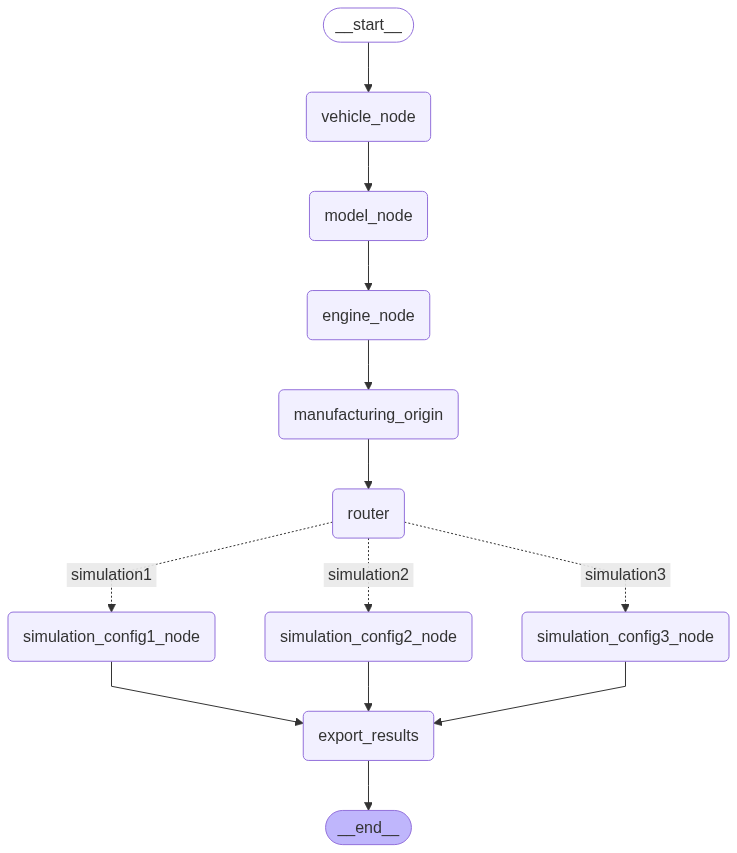

In [28]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))